Analysis
- TOP NTEE Categories

-NPO Count per Borough

-Top Asset Codes

-Top Income Codes

Graphs

-NPOs with “L” (Housing) NTEE Codes:

-LGBTQI-focused Organizations (R26)

-NTEE Cats per Borough


In [26]:
#import packages for analysis and plotting
import pandas as pd
import matplotlib as plt

In [26]:
#sets columns view
pd.set_option('display.max_columns', 500)

In [13]:
#reads in the data file
df = pd.read_excel('NYC_NP_Data.xlsx')

In [22]:
#lets us inspect the data
df.head(50)

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,CLASSIFICATION,RULING,DEDUCTIBILITY,FOUNDATION,ACTIVITY,ORGANIZATION,STATUS,TAX_PERIOD,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,NTEE,SORT_NAME,NTEE_Code_2
0,352518301,06 UNITED SOCCER CLUB INC,% KWOK LEE,9712 63RD DR APT 3A,REGO PARK,NY,11374-2244,0,3,3,2000,2014-11-01,1,16,0,1,1,2016-09-01,0,0,2,0,9,0.0,0.0,0.0,N64,"Recreation, Sports, Leisure, Athletics: Soccer...",NaN,N
1,261211059,1 SG MICHAEL S CURRY MEMORIAL FOUNDATION INC,% JEFFREY ARONSKY,800 2ND AVE RM 301,NEW YORK,NY,10017-9240,0,3,3,1000,2008-05-01,1,15,0,1,1,2014-09-01,1,3,2,0,9,1224.0,31769.0,31769.0,B82,"Education: Scholarships, Student Financial Aid...",NaN,B
2,813891758,1 WORLD EXPO INC,NaN,13447 166TH PL APT 10C,JAMAICA,NY,11434-3841,0,3,3,2000,2016-10-01,1,16,0,1,1,NaT,0,0,2,0,12,NaN,NaN,NaN,Q21,"International, Foreign Affairs and National Se...",NaN,Q
3,261368079,1 YOUTH AT A TIME INC,% EMILY JAMES,C/O EMILY JAMES 9530 AVENUE L,BROOKLYN,NY,11236-0000,0,3,3,1200,2009-12-01,1,15,0,1,1,2016-12-01,0,0,2,0,12,0.0,0.0,0.0,O50,"Youth Development: Youth Development Programs,...",NaN,O
4,475005707,10 FREEDOM PLACE HOUSING DEVELOPMENT FUND CORP...,% COMMON GROUND,505 EIGHTH AVENUE 5TH FLOOR,NEW YORK,NY,10018-6550,0,3,3,1000,2017-01-01,1,16,0,1,1,NaT,0,0,1,0,12,NaN,NaN,NaN,L20,"Housing, Shelter: Housing Development, Constru...",NaN,L
5,133732472,10 W 33 ST HOLDING CORP,% HIRSCHELL E LEVINE,WS B 1411 BROADWAY 9TH FL,NEW YORK,NY,10018-0000,0,2,3,1000,1993-10-01,2,0,912000000,1,1,2015-11-01,7,5,1,0,11,5448549.0,814880.0,814880.0,NaN,NaN,NaN,n
6,311628801,100 BLACKS WHO CARE INC,NaN,593 VANDERBILT AVE APT 133,BROOKLYN,NY,11238-3512,0,3,3,1000,1999-03-01,1,16,0,1,1,2016-12-01,0,0,2,0,12,0.0,0.0,0.0,R30,"Civil Rights, Social Action, Advocacy: Intergr...",NaN,R
7,133881096,100 EAST 182ND STREET HOUSING DEVELOPMENT FUND...,% FORDHAM BEDFORD HOUSING CORP,2751 GRAND CONCOURSE,BRONX,NY,10468-3001,0,3,3,1000,2012-03-01,1,15,0,1,1,2015-12-01,5,4,1,0,12,606172.0,341347.0,341347.0,I20,"Crime, Legal-Related: Crime Prevention N.E.C.",NaN,I
8,811671576,100 FOR ALL INC,NaN,271 W 146TH ST APT 15,NEW YORK,NY,10039-3711,0,3,3,1000,2016-11-01,1,15,0,1,1,2015-12-01,1,0,2,0,12,1.0,0.0,0.0,C32,"Environmental Quality, Protection and Beautifi...",NaN,C
9,133831889,100 HISPANIC WOMEN INC,NaN,413 E 120TH ST,NEW YORK,NY,10035-3602,0,3,3,1000,1999-01-01,1,15,0,1,1,2014-12-01,5,4,1,0,12,538785.0,133606.0,133606.0,S800,"Community Improvement, Capacity Building: Comm...",NaN,S


In [15]:
#strips the numbers from the NTEE code, so we can view the main category
df['NTEE_Code_2'] = df['NTEE_CD'].apply(lambda x: str(x)[0])

In [16]:
#counts non-profit per code
NTEE_Code_Count = df['NTEE_Code_2'].groupby(df['NTEE_Code_2']).count()

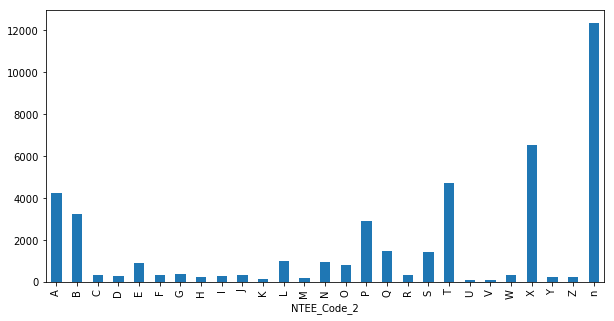

In [21]:
#plots the data above
NTEE_Code_Count.plot.bar(figsize=(10,5))

In [31]:
#filters for npo per city
npo_by_city = df.groupby(df['CITY'])['EIN'].count().sort_values(ascending=False)

In [36]:
npo_by_city

CITY
NEW YORK                 20629
BROOKLYN                 11995
BRONX                     3085
STATEN ISLAND             1467
FLUSHING                  1082
JAMAICA                    794
ASTORIA                    310
LONG IS CITY               247
LONG ISLAND CITY           241
BAYSIDE                    211
FOREST HILLS               211
FAR ROCKAWAY               194
WOODSIDE                   187
QUEENS VLG                 180
ELMHURST                   157
CORONA                     138
ELMONT                     134
WHITESTONE                 131
NEW YORK CITY              126
RICHMOND HILL              118
FRESH MEADOWS              113
FLORAL PARK                104
RIDGEWOOD                   95
EAST ELMHURST               95
KEW GARDENS                 90
REGO PARK                   89
SAINT ALBANS                89
HOLLIS                      88
OZONE PARK                  87
S OZONE PARK                86
                         ...  
KEW GARDEN HILLS             1
JAM

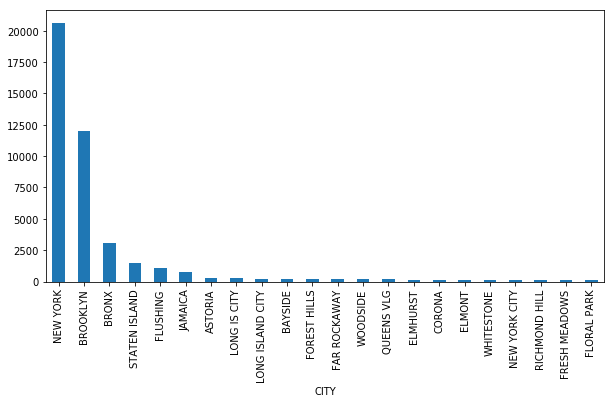

In [40]:
#plots npos per city
npo_by_city[npo_by_city>100].plot.bar(figsize=(10,5))

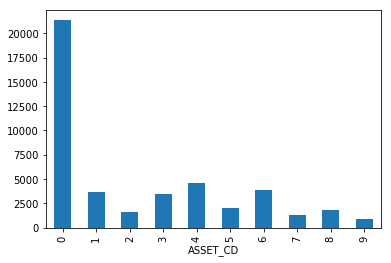

In [43]:
#filters nad plots number of npos per asset category
df['ASSET_CD'].groupby(df['ASSET_CD']).count().plot.bar()

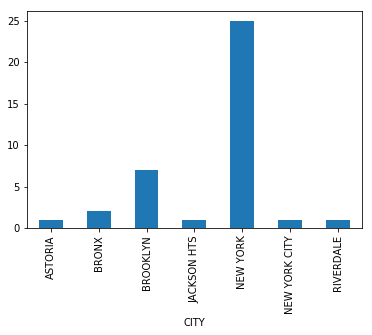

In [52]:
#filters and plots for lbgt orgs by city
df[df['NTEE_CD']=='R26']['CITY'].groupby(df['CITY']).count().plot.bar()

In [70]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
asset_by_city = df.groupby('CITY').mean()['ASSET_AMT'].sort_values(ascending=False)

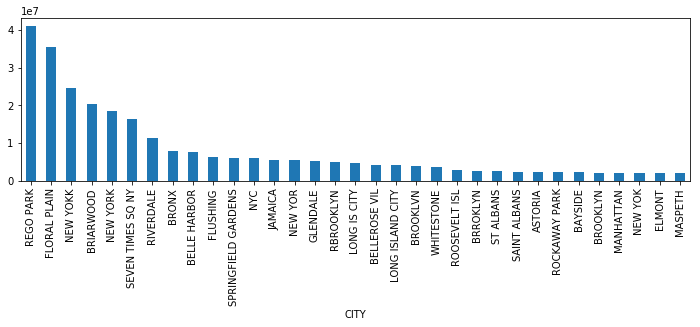

In [79]:
asset_by_city[asset_by_city>2000000].plot.bar(figsize=(12,3))

In [81]:
median_asset_by_city = df.groupby('CITY').median()['ASSET_AMT'].sort_values(ascending=False)

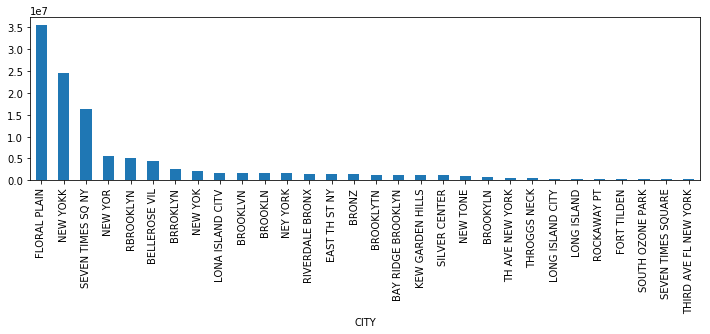

In [85]:
median_asset_by_city[median_asset_by_city>200000].plot.bar(figsize=(12,3))